![SquidGame](Img/squid-game.jpg)


# How does Squid Game come to rise..

Data Source: https://www.kaggle.com/starbucks/starbucks-menu
Data last updated date: 4 years ago

## Narrative:
Non technical

Squid game is a South Korean survival drama streaming televesion series created by Hwang Dong-hyuk for Netflix.

Squid Game was released worldwide on September 17, 2021, to critical acclaim and international attention. As of November 2021, it is Netflix's most-watched series, becoming the top-viewed program in 94 countries and attracting more than 142 million member households and amassing 1.65 billion viewing hours during its first four weeks from launch, outperforming the previous top series Bridgerton. (source: [Wikipedia](https://en.wikipedia.org/wiki/Squid_Game))

## 1. Import libraries and import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# country data
df = pd.read_csv('Data/all-weeks-countries.csv') # read data
df['week'] = pd.to_datetime(df['week']) # convert to datetime
df = df[df['show_title']=='Squid Game'] # keep only squid-game

# global data
global_df = pd.read_csv('Data/all-weeks-global.csv')
global_df['week'] = pd.to_datetime(global_df['week'])
global_df_sg = global_df[global_df['show_title']=='Squid Game']

In [3]:
print('This dataset looks at data across {} countries across {} weeks since {}'.format(
    df.country_name.unique().__len__(),
    ((df['week'].max()-df['week'].min()).days/7+1),
    df['week'].min()
)
     )

This dataset looks at data across 94 countries across 9.0 weeks since 2021-09-19 00:00:00


# 2. How does squid game perform globally since its release on Sep 17, 2021?

In [4]:
def ranking(row):
    date = row['week']-dt.timedelta(days=7)
    country = row['country_name']
    current_rank = row['weekly_rank']
    try:
        lookup_rank = df.loc[(df['country_name'] == country) & (df['week'] == date)]['weekly_rank'].values[0]
        return lookup_rank-current_rank
    except IndexError:
        return 0
    
df['weekly_change_in_ranking'] = df.apply(ranking, axis=1)

In [5]:
df_ranking_changes = pd.pivot_table(df, values='weekly_change_in_ranking', index='country_name', columns='week')
df_ranking = pd.pivot_table(df, values='weekly_rank', index='country_name', columns='week')

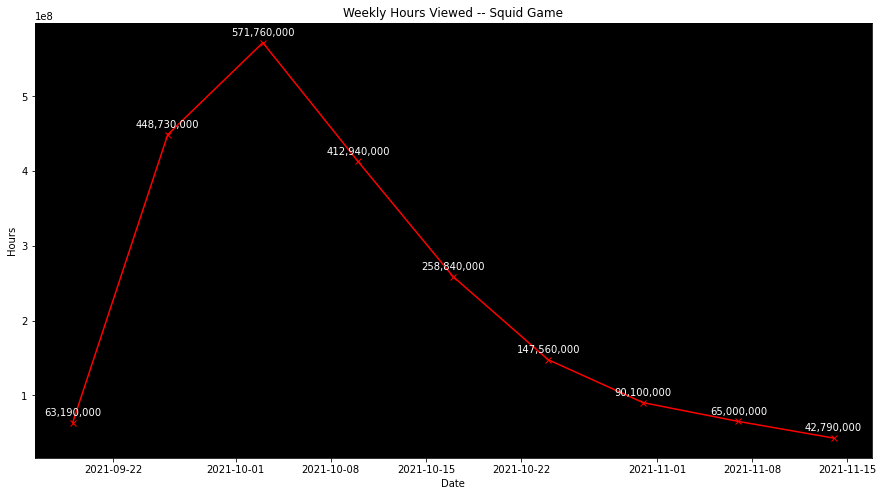

In [6]:
def add_value_labels(ax, typ, spacing=5):
    space = spacing
    va = 'bottom'

    if typ == 'bar':
        for i in ax.patches:
            y_value = i.get_height()
            x_value = i.get_x() + i.get_width() / 2

            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                    textcoords="offset points", ha='center', va=va)     
    if typ == 'line':
        line = ax.lines[0]
        for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            label = "{:,.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='center', va=va)

fig, ax = plt.subplots(figsize=(15,8))

plt.rcParams.update({'text.color': "white",
                     'axes.labelcolor': "black"})
ax.set_facecolor("black")

ax.set_xlabel('Date')
ax.set_ylabel('Hours')
ax.set_title('Weekly Hours Viewed -- Squid Game', color='black')

ax.plot(global_df_sg['week'], global_df_sg['weekly_hours_viewed'], color='r', marker='x')

add_value_labels(ax, 'line')

plt.show()

In [7]:
df_ranking.describe()

week,2021-09-19,2021-09-26,2021-10-03,2021-10-10,2021-10-17,2021-10-24,2021-10-31,2021-11-07,2021-11-14
count,82.000000,94.000000,94.000000,94.00000,94.000000,94.000000,94.000000,94.000000,93.000000
mean,5.268293,1.191489,1.010638,1.06383,1.329787,1.925532,2.265957,2.436170,3.946237
std,2.434570,0.421890,0.103142,0.24576,0.693880,1.018531,1.566968,1.763175,2.529674
min,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,2.000000
50%,5.000000,1.000000,1.000000,1.00000,1.000000,2.000000,2.000000,2.000000,3.000000
75%,7.000000,1.000000,1.000000,1.00000,1.000000,2.000000,3.000000,3.000000,5.000000
max,10.000000,3.000000,2.000000,2.00000,4.000000,5.000000,7.000000,9.000000,10.000000


#### with the figure and table shown above, Squid Game peak ranking was the week of 10/03/2021.
Since that week, the ranking and viewership dropped. 

# 3. How does it perform in each region/country?

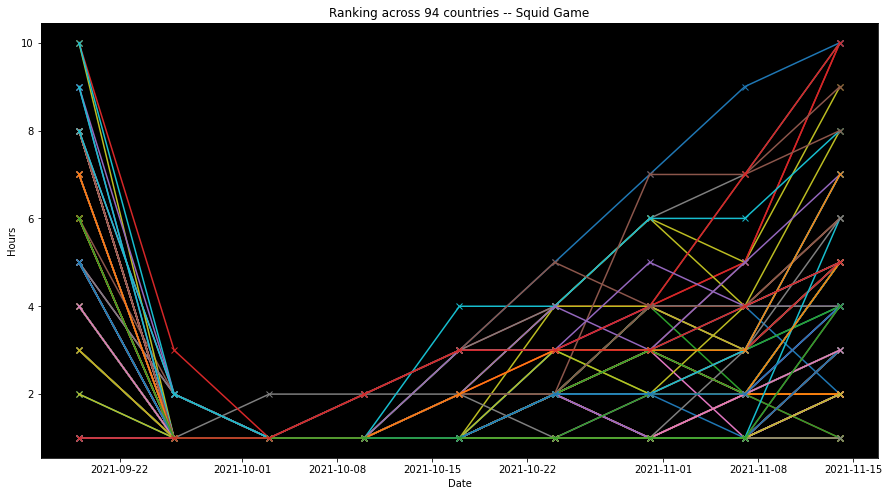

In [8]:
fig, ax = plt.subplots(figsize=(15,8))

plt.rcParams.update({'text.color': "white",
                     'axes.labelcolor': "black"})
ax.set_facecolor("black")

ax.set_xlabel('Date')
ax.set_ylabel('Hours')
ax.set_title('Ranking across 94 countries -- Squid Game', color='black')

country = df['country_name'].unique()
    
for i in country:
    ax.plot(df[df['country_name']==i]['week'], df[df['country_name']==i]['weekly_rank'], marker='x')

plt.show()

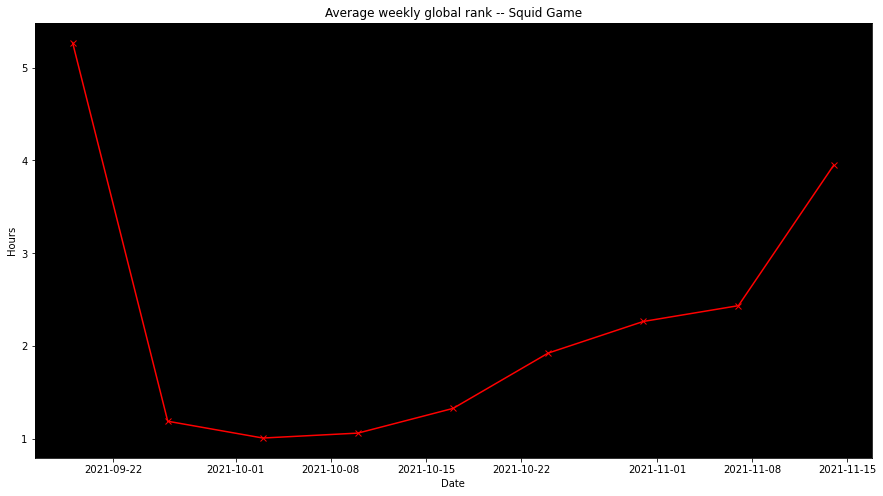

In [9]:
df_plot = df.groupby('week').agg({'weekly_rank':'mean'})

fig, ax = plt.subplots(figsize=(15,8))

plt.rcParams.update({'text.color': "white",
                     'axes.labelcolor': "black"})
ax.set_facecolor("black")

ax.set_xlabel('Date')
ax.set_ylabel('Hours')
ax.set_title('Average weekly global rank -- Squid Game', color='black')

country = df['country_name'].unique()
    
ax.plot(df_plot.index, df_plot['weekly_rank'], marker='x', color='red')

plt.show()

# Countries that catch on the trend very soon.
Looks like many of them are south east Asia and east asia countries.

In [10]:
df_ranking[df_ranking['09-19-2021'] == 1]

week,2021-09-19,2021-09-26,2021-10-03,2021-10-10,2021-10-17,2021-10-24,2021-10-31,2021-11-07,2021-11-14
country_name,,,,,,,,,
Hong Kong,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,5.0
Indonesia,1.0,1.0,1.0,2.0,3.0,3.0,4.0,4.0,4.0
Malaysia,1.0,1.0,1.0,2.0,3.0,3.0,3.0,4.0,4.0
Philippines,1.0,1.0,1.0,2.0,3.0,5.0,4.0,7.0,9.0
Singapore,1.0,1.0,1.0,1.0,2.0,4.0,3.0,5.0,7.0
South Korea,1.0,1.0,1.0,1.0,3.0,3.0,2.0,4.0,5.0
Thailand,1.0,1.0,1.0,1.0,3.0,3.0,5.0,4.0,5.0
Vietnam,1.0,1.0,1.0,2.0,3.0,3.0,3.0,4.0,5.0


### Countries that just catch on the trend.
Looks like many of them are middle east, and some east europe countries.

In [11]:
df_ranking[(df_ranking['11-14-2021'] == 1) & (df_ranking['09-19-2021'] >= 4)]

week,2021-09-19,2021-09-26,2021-10-03,2021-10-10,2021-10-17,2021-10-24,2021-10-31,2021-11-07,2021-11-14
country_name,,,,,,,,,
Austria,4.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
Bangladesh,6.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Germany,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
India,10.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Jordan,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Latvia,5.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
Morocco,4.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0
Nigeria,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Oman,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
